In [8]:
from groupy import config, Group, Bot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [9]:
# get group; if don't know group_id can filter by name (but name liable to change)
with open('groupy_key.txt', 'r') as f:
    key = f.read()
config.API_KEY = key
# rip = Group.list().filter(group_id='13678029')[0] # rip city
rip = Group.list().filter(group_id='24338846')[0] # stag city

In [10]:
# make a dict to go from user_ids to current name
rip_names = list(map(str, rip.members()))
rip_ids = list(map(lambda x: str(x.user_id), rip.members()))
rip_dict = dict(zip(rip_ids, rip_names))
# find and change accordingly
rip_dict['system'] = 'system'
# rip_dict['354536'] = 'ripbot'
rip_dict['356381'] = 'fitbot'

In [11]:
rip.message_count

1578

In [12]:
# get all messages (11,000+)
messages = rip.messages()
while messages.iolder():
    pass

In [13]:
# get info about messages
m_times = [m.created_at for m in messages]
m_users = [m.user_id for m in messages]
m_likes = [len(m.likes()) for m in messages]
m_text = [str(m.text).strip() for m in messages]

In [14]:
# put into dataframe
df = pd.DataFrame({'user_id':m_users}, index=m_times)
df['name'] = df['user_id'].map(rip_dict)
df['likes'] = m_likes
df['text'] = m_text
df['chars'] = df['text'].map(lambda x: len(x))

In [15]:
df.head()

,user_id,name,likes,text,chars
2016-11-18 11:39:12,22942080,AT,0,You're actually closer to me,28
2016-11-18 11:38:52,22942080,AT,0,"I thought he lived out in Beaverton, not way S...",56
2016-11-18 11:37:37,356381,fitbot,2,https://media2.giphy.com/media/FTtkq5gIGkHXa/g...,54
2016-11-18 11:37:37,19577557,Tyler Honsinger,0,Gifme titties,13
2016-11-18 11:36:57,15629412,Ben Whitehead,0,19025 sw Chesapeake dr tualatin or 97062,40


In [16]:
# calc some stats
stats = pd.DataFrame({'messages':df['name'].value_counts()})
stats.index.rename('name', inplace=True)
sums = df.groupby(['name']).sum()

stats = stats.merge(sums, left_index=True, right_index=True)
stats['like_per_m'] = stats['likes'] / stats['messages']
stats['like_per_char'] = stats['likes'] / stats['chars']

In [17]:
num_m = stats['messages'].sum()
num_l = stats['likes'].sum()

In [18]:
stats['perc_m'] = stats['messages'] / num_m * 100
stats['perc_l'] = stats['likes'] / num_l * 100

In [19]:
stats.sort_values('messages', ascending=False)

,messages,likes,chars,like_per_m,like_per_char,perc_m,perc_l
name,,,,,,,
AT,354,142,13000,0.401130,0.010923,22.433460,17.884131
Tyler Honsinger,221,88,6176,0.398190,0.014249,14.005070,11.083123
fitbot,201,106,13412,0.527363,0.007903,12.737643,13.350126
Kyle Barton,181,104,8956,0.574586,0.011612,11.470215,13.098237
Ben Whitehead,152,61,5559,0.401316,0.010973,9.632446,7.682620
August Schwartz,149,69,4522,0.463087,0.015259,9.442332,8.690176
Austin Kelly,77,38,2851,0.493506,0.013329,4.879594,4.785894
Chris Blaydon,63,53,2311,0.841270,0.022934,3.992395,6.675063
Ethan Bruno,56,34,3194,0.607143,0.010645,3.548796,4.282116


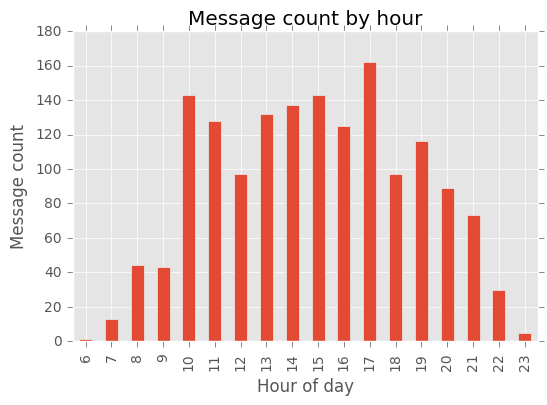

In [20]:
# do some plotting
ax = df.groupby([df.index.hour])['user_id'].count().plot(kind='bar')
ax.set_ylabel('Message count')
ax.set_xlabel('Hour of day')
ax.set_title('Message count by hour')

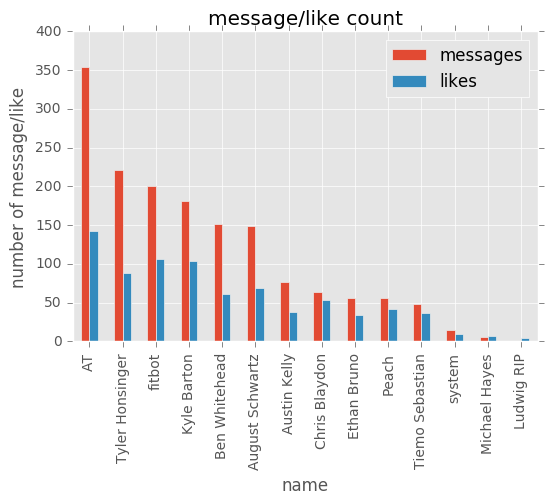

In [21]:
ax2 = stats[['messages', 'likes']].sort_values('messages', ascending=False).head(20).plot(kind='bar', stacked=False)
ax2.set_ylabel('number of message/like')
ax2.set_title('message/like count')

In [22]:
import io
corpus = io.StringIO()
for m in df['text']:
    try:
        corpus.write(m + '\n\n')
    except UnicodeEncodeError:
        pass

In [23]:
import markovify
text_model = markovify.NewlineText(corpus.getvalue())

In [24]:
for i in range(5):
    print(text_model.make_sentence())
    print()

Danny is killing me in the great white North?

Not west of the classes too

Yo. Were we supposed to ignore its own posts, so if the bot plus pluses or something

No shots unfortunately. I'm about 10 minutes from downtown so I might swing by for a week and a half. Damn. If anybody else wants to come throw but don't want to throw at Buckmanan.

too good to be up there..



In [28]:
test_bot = Bot.list().filter(group_id='23373961')[0]
group = Group.list().filter(group_id='23373961')[0]
# 24338846
ids = [member.user_id for member in group.members()]
loci = [[1, 0]] * len(ids)
print(ids, loci)
mens = attachments.Mentions(ids, loci)
# test_bot.post('Mention everyone.', mens)

['22942080', '13810222', '19657123', '15629412'] [[1, 0], [1, 0], [1, 0], [1, 0]]


True